In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.layers import BatchNormalization



import requests
from bs4 import BeautifulSoup
import os
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm
import time

Leemos los datos del archivo .fits

In [5]:
#archivos=['DataDESI_36.fits', 'DataDESI_72.fits', 'DataDESI_108.fits', 'DataDESI_144.fits', 'DataDESI_180.fits', 'DataDESI_216.fits'
 #, 'DataDESI_252.fits', 'DataDESI_288.fits', 'DataDESI_324.fits', 'DataDESI_360.fits', 'DataDESI_379.fits']
archivos=['DataDESI_36.fits', 'DataDESI_72.fits']

#Generamos las listas con los datos:
Spectra_set=np.array([[]]) #Este tensor contiene los elementos de flujo completo R+Z+B
y=np.array([]) #Esta lsita contiene las etiquetas para el ejercicio de clasificacion
z=np.array([]) #Esta matriz contiene los corrimientos z para el ejercicio de regresion

for h in range(len(archivos)):
    espc = fits.open(archivos[h]) #open file
    len_espc= len(espc[2].data)
    
    #leemos la informacion
    Bflux=espc[2].data
    Zflux=espc[4].data
    Rflux=espc[3].data

    spectra=np.hstack((Bflux, Zflux, Rflux)) #Contiene la cadena completa de flujo B+Z+R para cada espectro

    np.hstack((Spectra_set, spectra))
    #Spectra_set.append(np.vstack(spectra))
    
    y=np.append(y, Table.read(espc, hdu=1)['SPECTYPE'].data)
    z=np.append(z, Table.read(espc, hdu=1)['Z'].data)





ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 63349

In [13]:
spectra

array([[-0.45890513, -0.27773875, -0.17236681, ..., -1.5597138 ,
         0.10718923, -0.93966866],
       [-0.08245461,  0.19640063, -0.08018927, ..., -0.19244583,
         0.15742286,  0.16469315],
       [-0.20476615,  0.15615556,  0.4177056 , ...,  0.10900153,
         0.09285048,  0.04062431],
       ...,
       [-0.4557255 , -0.9066262 ,  0.39081916, ...,  0.22214139,
         0.4171082 , -2.0184479 ],
       [ 0.29040474,  0.2985962 , -0.09658743, ...,  1.0562565 ,
        -1.3907564 , -0.76336694],
       [-0.0181658 ,  0.33807427,  0.3190832 , ..., -2.30771   ,
         1.1311486 , -0.01389151]], dtype=float32)

In [14]:
Spectra_set

[array([[ 0.935347  ,  0.27240726, -0.38664877, ...,  0.9562363 ,
         -0.37178668, -0.7521095 ],
        [ 0.25327054,  0.18184069,  1.244743  , ..., -0.66501385,
         -0.01586119, -1.141923  ],
        [ 1.8557993 , -0.46904755,  1.1547266 , ...,  2.8392544 ,
          0.68404454, -0.9047936 ],
        ...,
        [-0.21385135, -0.1921615 ,  0.1384646 , ...,  0.17104994,
          0.27006027, -0.02038243],
        [-0.13131966, -0.8624054 , -0.5951029 , ..., -0.1974684 ,
          0.23959278, -0.73701453],
        [ 0.4781402 , -0.36980662,  0.12547916, ...,  0.08428811,
         -0.32912153,  0.20088711]], dtype=float32),
 array([[-0.45890513, -0.27773875, -0.17236681, ..., -1.5597138 ,
          0.10718923, -0.93966866],
        [-0.08245461,  0.19640063, -0.08018927, ..., -0.19244583,
          0.15742286,  0.16469315],
        [-0.20476615,  0.15615556,  0.4177056 , ...,  0.10900153,
          0.09285048,  0.04062431],
        ...,
        [-0.4557255 , -0.9066262 ,  0.3

In [87]:
z

array([1.05626664, 0.51448212, 1.5490695 , ..., 1.51028485, 0.80935722,
       0.74579183])

In [85]:
y

array(['GALAXY', 'GALAXY', 'QSO', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U32')

In [95]:
len(Spectra_set[0])

7958

In [96]:
len(Spectra_set)

63349

In [109]:
Spectra_set

array([[-0.45890513, -0.27773875, -0.17236681, ..., -1.5597138 ,
         0.10718923, -0.93966866],
       [-0.08245461,  0.19640063, -0.08018927, ..., -0.19244583,
         0.15742286,  0.16469315],
       [-0.20476615,  0.15615556,  0.4177056 , ...,  0.10900153,
         0.09285048,  0.04062431],
       ...,
       [-0.4557255 , -0.9066262 ,  0.39081916, ...,  0.22214139,
         0.4171082 , -2.0184479 ],
       [ 0.29040474,  0.2985962 , -0.09658743, ...,  1.0562565 ,
        -1.3907564 , -0.76336694],
       [-0.0181658 ,  0.33807427,  0.3190832 , ..., -2.30771   ,
         1.1311486 , -0.01389151]], dtype=float32)

Ejercicio de regresión. Aqui predecimos el valor del corrimiento al rojo 'z' de cada espectro

Epoch 1/100
60/60 [==============================] - 14s 224ms/step - loss: 1.7237 - mse: 1.7237 - val_loss: 0.6224 - val_mse: 0.6224
Epoch 2/100
60/60 [==============================] - 13s 222ms/step - loss: 1.1340 - mse: 1.1340 - val_loss: 0.3402 - val_mse: 0.3402
Epoch 3/100
60/60 [==============================] - 13s 224ms/step - loss: 1.0298 - mse: 1.0298 - val_loss: 0.2960 - val_mse: 0.2960
Epoch 4/100
60/60 [==============================] - 13s 224ms/step - loss: 0.8308 - mse: 0.8308 - val_loss: 0.2846 - val_mse: 0.2846
Epoch 5/100
60/60 [==============================] - 13s 224ms/step - loss: 0.7810 - mse: 0.7810 - val_loss: 0.2823 - val_mse: 0.2823
Epoch 6/100
60/60 [==============================] - 13s 222ms/step - loss: 0.7316 - mse: 0.7316 - val_loss: 0.2855 - val_mse: 0.2855
Epoch 7/100
60/60 [==============================] - 13s 220ms/step - loss: 0.6252 - mse: 0.6252 - val_loss: 0.2831 - val_mse: 0.2831
Epoch 8/100
60/60 [==============================] - 13s 221ms

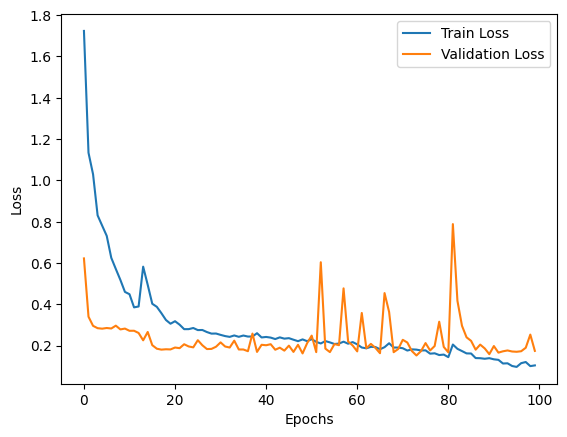

19/19 [==============================] - 1s 45ms/step


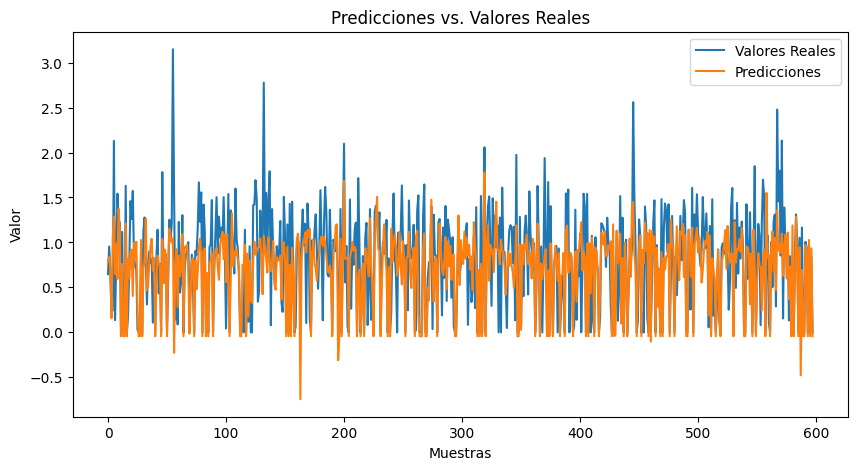

In [68]:
output_shape=1
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)


#Crea el modelo de CNN
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=15, activation='relu', strides=2, input_shape=(len(X[0]),1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))## considerar tanh
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_shape, activation='linear'))  # Capa de salida lineal para regresión, output_shape debe ser =1

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse']) ## considerar el mae y huber.

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evalúa el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error (MSE) or loss:", loss)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Visualización del Rendimiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Visualizar las predicciones y los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Valores Reales")
plt.plot(predictions, label="Predicciones")
plt.legend()
plt.title("Predicciones vs. Valores Reales")
plt.xlabel("Muestras")
plt.ylabel("Valor")
plt.show()

Ejercicio de clasifiación. Aqui predecimos la clase o tipo espectral de cada espectro de entrada

[0 0 0 ... 0 0 0]
Epoch 1/100
60/60 [==============================] - 6s 80ms/step - loss: 1.2522 - accuracy: 0.4728 - val_loss: 0.9055 - val_accuracy: 0.7766
Epoch 2/100
60/60 [==============================] - 5s 80ms/step - loss: 0.7663 - accuracy: 0.7584 - val_loss: 0.4519 - val_accuracy: 0.9374
Epoch 3/100
60/60 [==============================] - 5s 81ms/step - loss: 0.4684 - accuracy: 0.8896 - val_loss: 0.2495 - val_accuracy: 0.9499
Epoch 4/100
60/60 [==============================] - 5s 78ms/step - loss: 0.3233 - accuracy: 0.9236 - val_loss: 0.3151 - val_accuracy: 0.9499
Epoch 5/100
60/60 [==============================] - 5s 79ms/step - loss: 0.2537 - accuracy: 0.9383 - val_loss: 0.3387 - val_accuracy: 0.9499
Epoch 6/100
60/60 [==============================] - 5s 78ms/step - loss: 0.2600 - accuracy: 0.9378 - val_loss: 0.2314 - val_accuracy: 0.9478
Epoch 7/100
60/60 [==============================] - 5s 79ms/step - loss: 0.2426 - accuracy: 0.9404 - val_loss: 0.2342 - val_accur

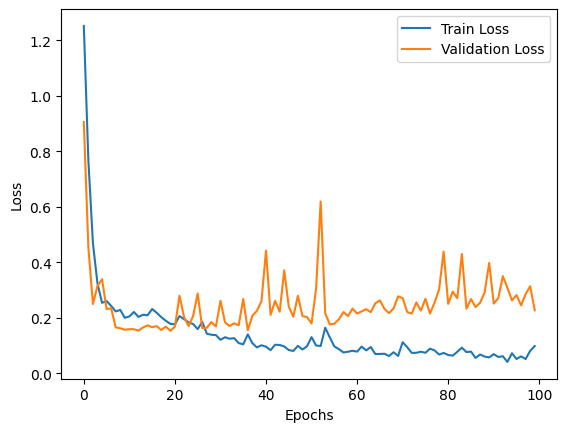

19/19 [==============================] - 0s 17ms/step
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 1 Etiqueta Real: 0
Predicción: 1 Etiqueta Real: 1
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 1 Etiqueta Real: 1
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 2
Predicción: 0 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 2
Predicción: 0 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 2
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 1 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 0 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 2
Predicción: 2 Etiqueta Real: 2
Predicción: 0 Etiqueta Real: 0
Predicción: 2 Etiqueta Real: 2
Predicción: 0 Et

In [85]:
num_classes = 3  # Número de clases

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convierte las etiquetas a codificación one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)      #GALAXY=0=[1,0,0]; QSO=1=[0,1,0]; STAR=2=[0,0,1]


# Crea el modelo de CNN
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=15, activation='relu', strides=2, input_shape=(len(X[0]),1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=15, activation='relu', strides=2))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evalúa el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss:", loss)
print(f'Accuracy: {accuracy * 100:.2f}%')


#Visualización del Rendimiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convierte las predicciones one-hot a etiquetas
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Visualizar algunas predicciones y etiquetas reales
for i in range(100):
    print("Predicción:", predicted_labels[i], "Etiqueta Real:", true_labels[i])
